# EDA

In [2]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
sns.set_theme()

In [3]:
# Acceso a el cvs y se pasa a un dataframe 
df_energy = pd.read_csv('../Data/energy_clean.csv')

In [4]:
# Visualización de manera general
df_energy.head()

,Country,Energy_type,Year,Energy_consumption,CO2_emission
0,United States,all_energy_types,1980,78.021113,4946.627130
1,United States,coal,1980,15.422809,1409.790188
2,United States,natural_gas,1980,20.235459,1081.593377
3,United States,petroleum_n_other_liquids,1980,34.158965,2455.243565
4,United States,nuclear,1980,2.739169,0.000000


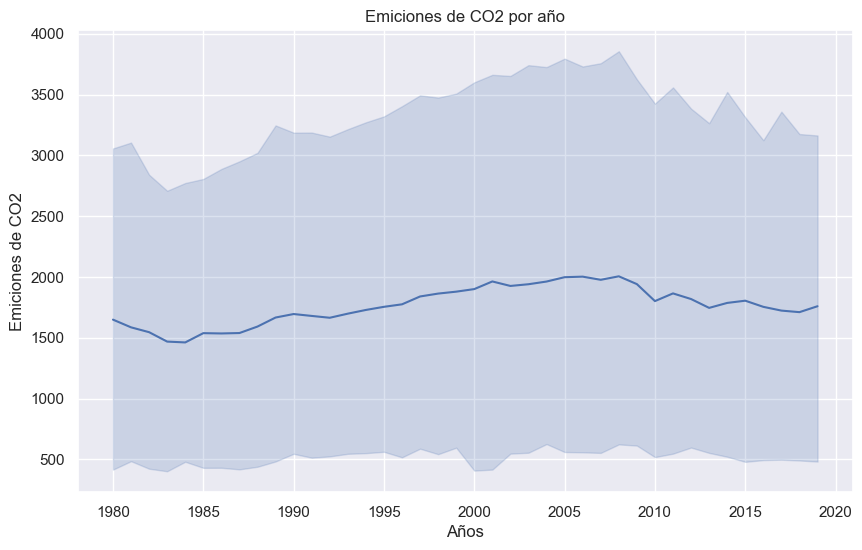

In [5]:
# Visualización de el consumo de las diferentes energias a nivel de Estados Unidos 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='CO2_emission', data=df_energy)
plt.xlabel('Años')
plt.ylabel('Emiciones de CO2')
plt.title('Emiciones de CO2 por año')
plt.show()

En el anterior grafico se puede ver que tuvimos un pico de emiciones de CO2 entre los años 1995 y 2010, de el año 2010 a tenido una disminución para los años actuales esto a nivel general de los diferentes tipos de energia

In [6]:
# Tipos de energia
df_energy['Energy_type'].unique()

array(['all_energy_types', 'coal', 'natural_gas',
       'petroleum_n_other_liquids', 'nuclear', 'renewables_n_other'],
      dtype=object)

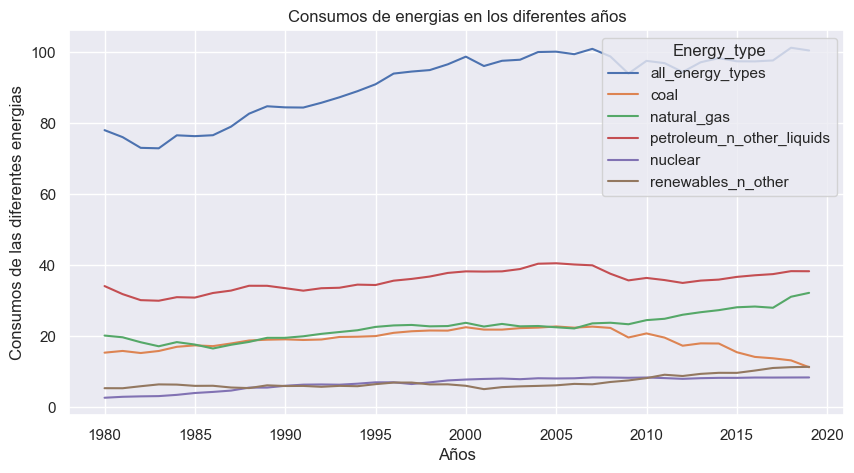

In [7]:
# Visualización de los tipos de energia 
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y= 'Energy_consumption', hue='Energy_type', data= df_energy)
plt.xlabel('Años')
plt.ylabel('Consumos de las diferentes energias')
plt.title('Consumos de energias en los diferentes años')
plt.show()

En el anterior grafico se puede ver un ingremento en el consumo de todas las energias menos el carbon, teniendo como mayor consumo la energia proveniente del petroleo.

In [8]:
# Filtramos todas las energias sin contar con la suma de todas las energias
df_energy_filtrado = df_energy[df_energy['Energy_type'] != 'all_energy_types']

In [9]:
# Descripción general de los datos que tenemos 
df_energy_filtrado.describe()

,Year,Energy_consumption,CO2_emission
count,200.000000,200.000000,200.000000
mean,1999.500000,18.264461,1058.019330
std,11.572364,11.118257,951.072539
min,1980.000000,2.739169,0.000000
25%,1989.750000,7.799326,0.000000
50%,1999.500000,18.197428,1191.538356
75%,2009.250000,24.025903,2001.852475
max,2019.000000,40.572561,2644.382460


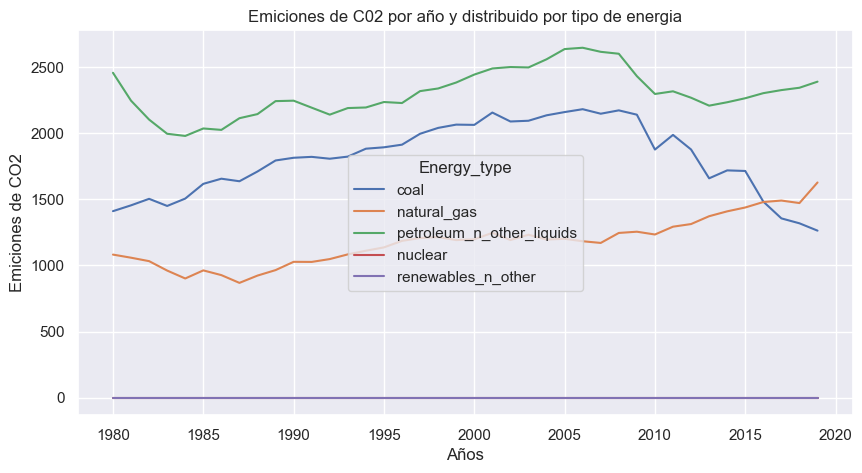

In [10]:
# Grafico de todas las energias y su impacto de CO2
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='CO2_emission', hue='Energy_type', data=df_energy_filtrado)
plt.xlabel('Años')
plt.ylabel('Emiciones de CO2')
plt.title('Emiciones de C02 por año y distribuido por tipo de energia')
plt.show()

En el anterior grafico podemos ver que una de las energias que mas a tenido un efecto de CO2 es el petroleo, y una de las que a tomado una baja en su consumo es el coal en los ultimos años

In [11]:
# Filtramos el valor total de CO2, donde contiene todas las energias 
df_energy_filtradoT = df_energy[df_energy['Energy_type'] == 'all_energy_types']

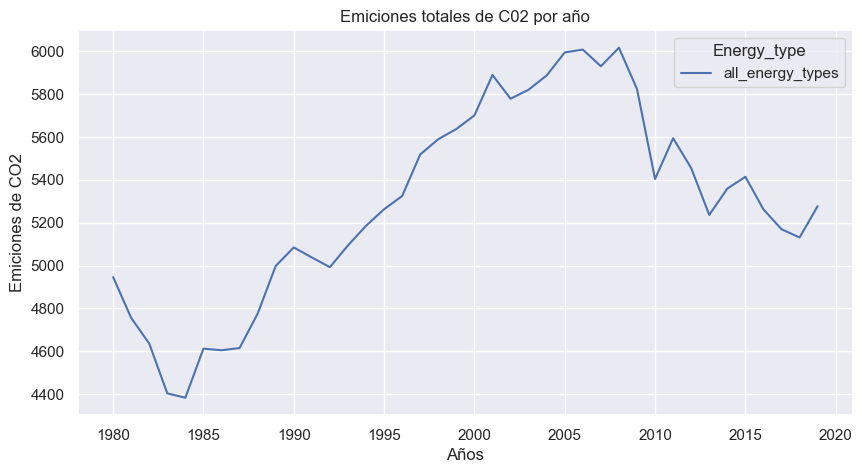

In [12]:
# Grafico de todas las energias y su impacto de CO2
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='CO2_emission', hue='Energy_type', data=df_energy_filtradoT)
plt.xlabel('Años')
plt.ylabel('Emiciones de CO2')
plt.title('Emiciones totales de C02 por año')
plt.show()

En el grafico podemos ver las emiciones totales de CO2 las cuales son responsabilidad del uso de las diferentes energias.

Text(0.5, 1.0, 'Emiciones de CO2 de todas las energias')

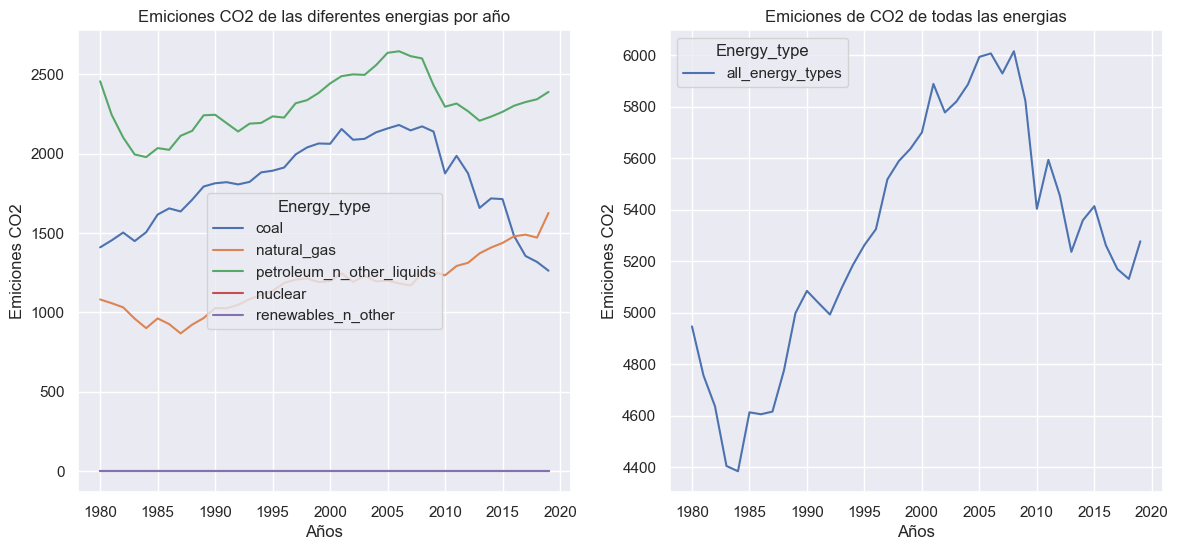

In [13]:
fig , axes = plt.subplots(1,2, figsize=(14, 6))
sns.lineplot(x='Year', y='CO2_emission', hue='Energy_type', data=df_energy_filtrado, ax=axes[0])
axes[0].set_xlabel('Años')
axes[0].set_ylabel('Emiciones CO2')
axes[0].set_title('Emiciones CO2 de las diferentes energias por año')
# Segundo grafico 
sns.lineplot(x='Year', y='CO2_emission', hue='Energy_type', data=df_energy_filtradoT, ax=axes[1])
axes[1].set_xlabel('Años')
axes[1].set_ylabel('Emiciones CO2')
axes[1].set_title('Emiciones de CO2 de todas las energias')

Podemos concluir en estos dos gráficos donde las diferentes energias empleadas una de las que a tenido mayor impacto de CO2 es la proveniente de petroleo y que a pesar de implementación de energas renovables, sigue estando al alza.
Uno de los picos más altos se puede ver donde el coal y el petroleo tubieron un aumento considerable pero en la actualida el carbon muestra un declive en comparacion con los años anteriores.

# KPI
Se propone bajar el indice de CO2 un 2% anual, por 10 años a nivel nacional dando como impacto principal la ciudad de New York, con implementación de vehículos electricos que no depende del petroleo ni de ninguna energia que produsca CO2.
# Conclusión 
Se quiere con esta acción bajar los indices de CO2 por medio de implementación de autos electricos que tienen un impacto de CO2 de 0, esto influye en una ciudad con menos contaminación y por ende la mejora de la calidad del aire.
# Metricas y cálculko del KPI
((CO2_emission_Año_anterior - CO2_emission_Año_actual)/CO2_emission_Año_anterior)* 100 = % 